In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gazp = pd.read_csv("data/GAZP.txt")
sber = pd.read_csv("data/SBER.txt")

In [4]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [5]:
res = pd.merge(gazp, sber, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,GAZP,D,20101001,0,160.54,60923751,SBER,D,0,89.09,332429890
1,GAZP,D,20101004,0,161.99,61902787,SBER,D,0,89.88,194032721
2,GAZP,D,20101005,0,162.44,61546943,SBER,D,0,91.97,198775753
3,GAZP,D,20101006,0,163.00,67921495,SBER,D,0,91.20,210406027
4,GAZP,D,20101007,0,162.49,43529081,SBER,D,0,90.40,145137617


In [6]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

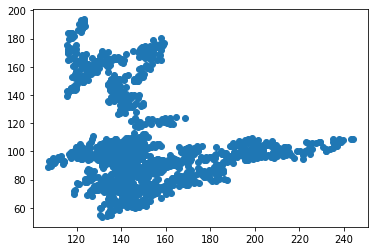

In [7]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [8]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def BGD(self, X, Y):
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [9]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 5769.919997525599


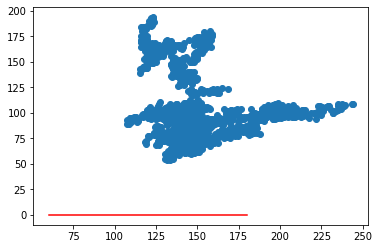

In [10]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()